#                                  PANDAS RETAIL CASE STUDY

### IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### IMPORTING DATASETS

In [3]:
customer = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Customer.csv')
product_info = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/prod_cat_info.csv')
transactions = pd.read_csv('C:/Users/shubh/Desktop/ALABS PYTHON CASE STUDIES/FOUNDATION/3. Pandas Case Study 1 - Retail Case Study/3. Pandas Case Study 1 - Retail Case Study/Transactions.csv')

## Q1. 
### Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [4]:
customer_semi_final = pd.merge(left = customer, right = transactions, 
                               how = 'right', 
                               left_on = 'customer_Id', right_on = 'cust_id')
customer_semi_final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,270351,26-09-1981,M,5.0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop
1,270351,26-09-1981,M,5.0,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop


In [5]:
customer_final = pd.merge(left = customer_semi_final, right = product_info, 
                          how = 'left', 
                          left_on = ['prod_cat_code', 'prod_subcat_code'], right_on = ['prod_cat_code', 'prod_sub_cat_code'])
customer_final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,1,Women
1,270351,26-09-1981,M,5.0,80712190438,270351,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,Clothing,1,Women


#### REMOVING DUPLICATE COLUMNS FOR BETTER PERFORMANCE

In [6]:
customer_final.drop(columns = ['cust_id', 'prod_sub_cat_code'], inplace = True)
customer_final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women
1,270351,26-09-1981,M,5.0,80712190438,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women


## Q2.
### Prepare a summary report for the merged data set.

#### (a) Get the column names and their corresponding data types

In [7]:
customer_final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

#### CORRECTING DATA TYPES OF VARIABLES

In [8]:
customer_final['customer_Id'] = customer_final['customer_Id'].astype('object')
customer_final['city_code'] = customer_final['city_code'].astype('object')
customer_final['transaction_id'] = customer_final['transaction_id'].astype('object')
customer_final['prod_subcat_code'] = customer_final['prod_subcat_code'].astype('object')
customer_final['prod_cat_code'] = customer_final['prod_cat_code'].astype('object')
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format = '%d-%m-%Y')

In [9]:
customer_final['tran_date'] = customer_final['tran_date'].str.replace('/', '-')
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'], format = '%d-%m-%Y')

#### (b) Top/Bottom 10 observations

In [10]:
pd.concat([customer_final.head(10), customer_final.tail(10)], axis = 0)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,270351,1981-09-26,M,5,36957441426,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store,Footwear,Women
3,270351,1981-09-26,M,5,12236277258,2013-03-18,8,3,3,1030,324.450,3414.450,e-Shop,Electronics,Personal Appliances
4,270351,1981-09-26,M,5,13181563739,2011-12-13,6,5,1,1048,110.040,1158.040,e-Shop,Books,DIY
5,270384,1973-05-11,F,8,29258453508,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
6,270384,1973-05-11,F,8,29258453508,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers
7,270384,1973-05-11,F,8,92734514344,2013-10-26,1,4,2,1362,286.020,3010.020,TeleShop,Bags,Mens
8,270384,1973-05-11,F,8,865952996,2013-08-06,12,6,2,86,18.060,190.060,MBR,Home and kitchen,Tools
9,270384,1973-05-11,F,8,4116651679,2013-08-06,6,5,1,1343,141.015,1484.015,TeleShop,Books,DIY


#### (c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [11]:
customer_final.describe().iloc[ 3 : , ]

,Qty,Rate,Tax,total_amt
min,-5.0,-1499.0,7.350,-8270.925
25%,1.0,312.0,98.280,762.450
50%,3.0,710.0,199.080,1754.740
75%,4.0,1109.0,365.715,3569.150
max,5.0,1500.0,787.500,8287.500


#### (d) Frequency tables for all the categorical variables

In [12]:
pd.crosstab(index = customer_final.Gender, columns = 'frequency')

col_0,frequency
Gender,
F,11233
M,11811


In [13]:
pd.crosstab(index = customer_final.city_code, columns = 'frequency')

col_0,frequency
city_code,
1.0,2258
2.0,2270
3.0,2411
4.0,2422
5.0,2360
6.0,2127
7.0,2356
8.0,2330
9.0,2178


In [14]:
pd.crosstab(index = customer_final.Store_type, columns = 'frequency')

col_0,frequency
Store_type,
Flagship store,4577
MBR,4661
TeleShop,4504
e-Shop,9311


In [15]:
pd.crosstab(index = customer_final.prod_cat, columns = 'Quantity', values = customer_final.Qty, aggfunc = 'sum')

col_0,Quantity
prod_cat,
Bags,4708
Books,14669
Clothing,7174
Electronics,12308
Footwear,7274
Home and kitchen,9941


In [16]:
pd.crosstab(index = customer_final.prod_subcat, columns = 'Quantity', values = customer_final.Qty, aggfunc = 'sum')

col_0,Quantity
prod_subcat,
Academic,2298
Audio and video,2486
Bath,2478
Cameras,2413
Children,2487
Comics,2448
Computers,2395
DIY,2405
Fiction,2573


### Q3.
### Generate histograms for all continuous variables and frequency bars for categorical variables.

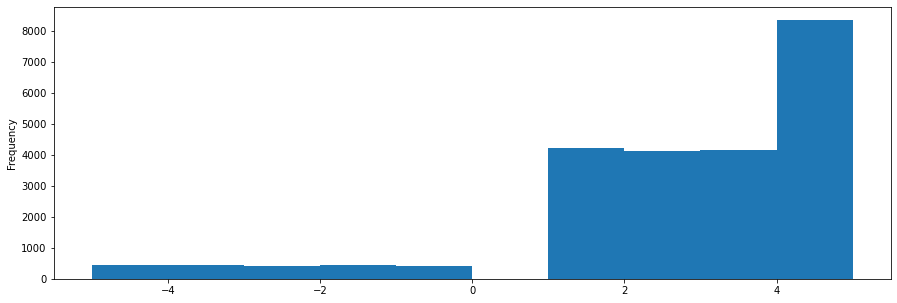

In [17]:
customer_final['Qty'].plot(kind = 'hist', bins = 10, figsize = (15, 5))
plt.show()

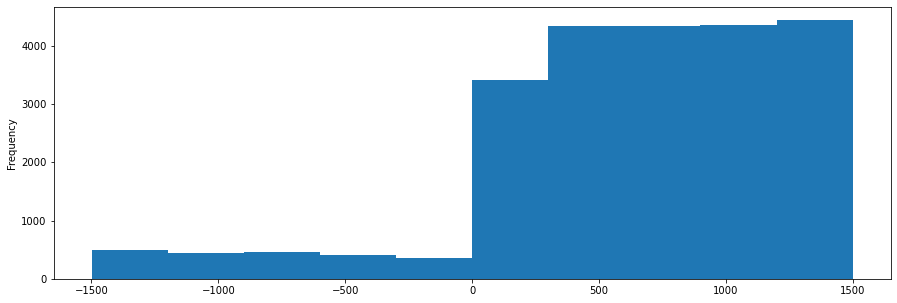

In [18]:
customer_final['Rate'].plot(kind = 'hist', bins = 10, figsize = (15, 5))
plt.show()

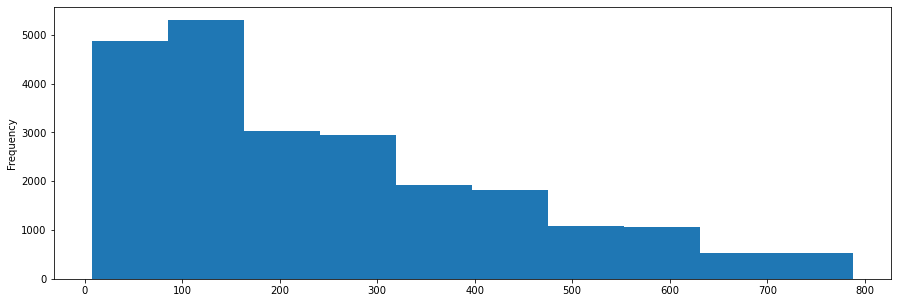

In [19]:
customer_final['Tax'].plot(kind = 'hist', bins = 10, figsize = (15, 5))
plt.show()

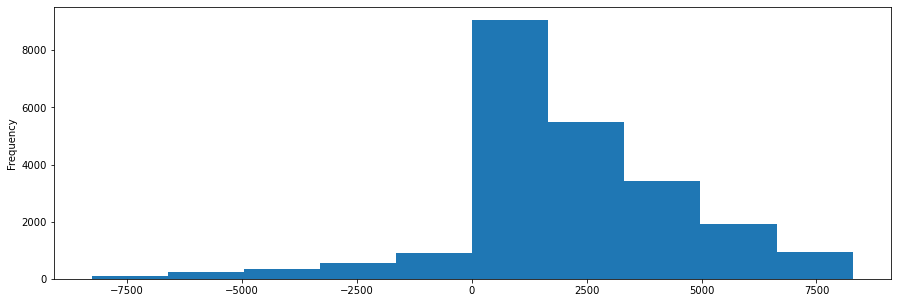

In [20]:
customer_final['total_amt'].plot(kind = 'hist', bins = 10, figsize = (15, 5))
plt.show()

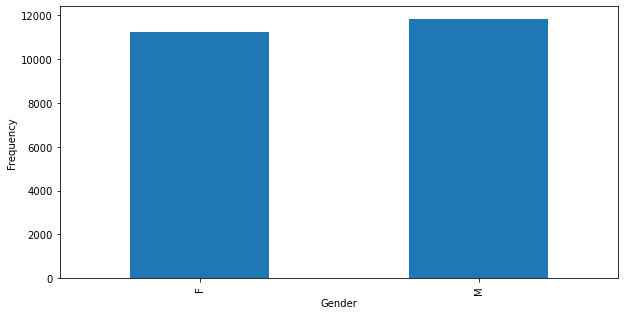

In [21]:
pd.crosstab(index = customer_final.Gender, columns = 'frequency').plot(kind = 'bar', figsize = (10, 5), legend = False)
plt.ylabel('Frequency')
plt.show()

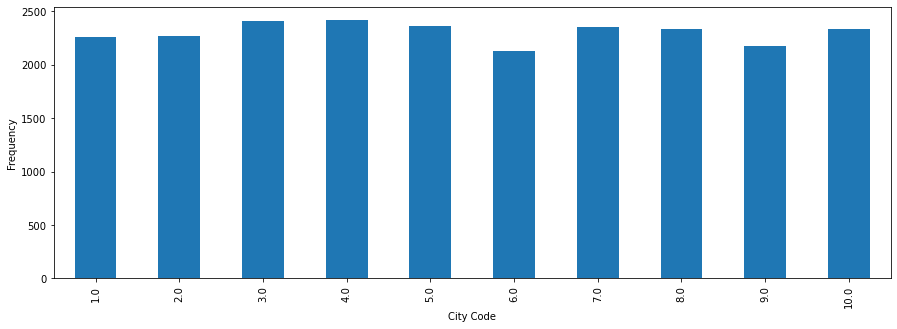

In [39]:
pd.crosstab(index = customer_final.city_code, columns = 'frequency').plot(kind = 'bar', figsize = (15, 5), legend = False)
plt.xlabel('City Code')
plt.ylabel('Frequency')
plt.show()

## Q4. Calculate the following information using the merged dataset :
### (a)
### Time period of the available transaction data

In [41]:
(max(customer_final['tran_date']) - min(customer_final['tran_date']))

Timedelta('1130 days 00:00:00')

### (b)
### Count of transactions where the total amount of transaction was negative

In [24]:
customer_final.loc[ customer_final['total_amt'] < 0, 'total_amt' ].count()

2177

## Q5.
### Analyze which product categories are more popular among females vs male customers.

In [25]:
pd.crosstab(index = customer_final['Gender'], 
            columns = customer_final['prod_cat'], 
            values = customer_final['prod_cat'].values, 
            aggfunc = 'count')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,994,2949,1439,2328,1529,1994
M,1004,3116,1518,2570,1469,2134


## Q6.
### Which City code has the maximum customers and what was the percentage of customers from that city?

In [26]:
q6_data = customer_final.groupby(['city_code', 'customer_Id']).count()

In [27]:
q6_data.reset_index(inplace = True)

In [28]:
q6_data = pd.DataFrame(pd.crosstab(index = q6_data.city_code, columns = 'frequency').reset_index())

In [29]:
q6_data[q6_data.frequency == max(q6_data.frequency)]

col_0,city_code,frequency
2,3.0,576


In [30]:
print('Percentage of customers', ((q6_data['frequency'][q6_data.frequency == max(q6_data.frequency)]/sum(q6_data.frequency))*100).values)

Percentage of customers [10.46511628]


## Q7.
### Which store type sells the maximum products by value and by quantity?

In [31]:
# MAXIMUM PRODUCTS BY VALUE
max_prod_value = pd.DataFrame(customer_final[customer_final['total_amt'] > 0].groupby('Store_type').total_amt.sum())
max_prod_value[max_prod_value['total_amt'] == max(max_prod_value['total_amt'])]

,total_amt
Store_type,
e-Shop,2.218561e+07


In [32]:
# MAXIMUM PRODUCTS BY QUANTITY
max_prod_value = pd.DataFrame(customer_final[customer_final['Qty'] > 0].groupby('Store_type').Qty.sum())
max_prod_value[max_prod_value['Qty'] == max(max_prod_value['Qty'])]

,Qty
Store_type,
e-Shop,25435


## Q8.
### What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [33]:
customer_final[((customer_final['prod_cat'] == 'Electronics') | (customer_final['prod_cat'] == 'Clothing')) &
                (customer_final['Store_type'] == 'Flagship store') &
                (customer_final['total_amt'] > 0)]['total_amt'].sum()

3851454.295

## Q9.
### What was the total amount earned from "Male" customers under the "Electronics" category?

In [34]:
customer_final[((customer_final['prod_cat'] == 'Electronics') | (customer_final['Gender'] == 'M')) &
                (customer_final['total_amt'] > 0)]['total_amt'].sum()

33423695.240000002

## Q10.
### How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [35]:
customer_10_unique_transc = pd.DataFrame(customer_final[customer_final['total_amt'] > 0].groupby(by = 'customer_Id').transaction_id.count())
customer_10_unique_transc[customer_10_unique_transc['transaction_id'] > 10].count()

transaction_id    6
dtype: int64

## Q11.
### For all customers aged between 25 - 35, find out:
#### (a) What was the total amount spent for “Electronics” and “Books” product categories?

In [36]:
cust_age_25_35 = customer_final[((customer_final['tran_date'] - customer_final['DOB']).dt.days/365.25 >= 25) & 
                                ((customer_final['tran_date'] - customer_final['DOB']).dt.days/365.25 <= 35)]

In [37]:
cust_age_25_35.loc[((cust_age_25_35['prod_cat'] == 'Electronics') | 
                    (cust_age_25_35['prod_cat'] == 'Electronics')) &
                    (cust_age_25_35['total_amt'] > 0), 'total_amt' ].sum()

5096453.375

#### (b) What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [38]:
cust_age_25_35.loc[(cust_age_25_35['tran_date'] >= '2014-01-01') &
                   (cust_age_25_35['tran_date'] <= '2014-03-01') &
                   (cust_age_25_35['total_amt'] > 0),
                   'total_amt'].sum()

1121544.06